In [1]:
import os
import sys

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../src/features')
import build_features as bf

In [2]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [3]:
cleanTrain=bf.executeFeatures(originalDF)

3 columns were label encoded


In [4]:
for i in cleanTrain.columns:
    print(i)

TARGET
DAYS_BIRTH
scaledLogINC
DAYS_EMPLOYED_ANOM
DAYS_EMPLOYED_ZERO
DAYS_EMPLOYED
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
EDU_Academic degree
EDU_Higher education
EDU_Incomplete higher
EDU_Lower secondary
EDU_Secondary / secondary special
FAM_Civil marriage
FAM_Married
FAM_Separated
FAM_Single / not married
FAM_Unknown
FAM_Widow
INC_Businessman
INC_Commercial associate
INC_Maternity leave
INC_Pensioner
INC_State servant
INC_Student
INC_Unemployed
INC_Working


In [5]:
cleanTrain.columns = ['TARGET', 'DAYS_BIRTH', 'scaledLogINC', 'DAYS_EMPLOYED_ANOM' ,'DAYS_EMPLOYED_ZERO','DAYS_EMPLOYED', 
 'NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','EDU_Academic_degree', 'EDU_Higher_education', 'EDU_Incomplete_higher', 'EDU_Lower_secondary', 
 'EDU_Secondary_special', 'FAM_Civil_marriage', 'FAM_Married', 'FAM_Separated', 'FAM_Single', 'FAM_Unknown',
 'FAM_Widow','INC_Businessman','INC_Commercial','INC_Maternity' , 'INC_Pensioner','INC_State','INC_Student',
 'INC_Unemployed','INC_Working']

## Build Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cleanTrain.iloc[:,1:], 
                                                    cleanTrain.TARGET, test_size = 0.2, random_state = 0)

In [8]:
clf = linear_model.LogisticRegression().fit(X_train, y_train)

In [9]:
clf.score(X_test, y_test)

0.9210607612636782

## Investigate with ANOVA

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
anovaTest = cleanTrain.columns[0] + " ~ " + cleanTrain.columns[1]
for i in cleanTrain.columns[2:]:
    anovaTest = anovaTest + " + " + i

In [12]:
anovaTest

'TARGET ~ DAYS_BIRTH + scaledLogINC + DAYS_EMPLOYED_ANOM + DAYS_EMPLOYED_ZERO + DAYS_EMPLOYED + NAME_CONTRACT_TYPE + FLAG_OWN_CAR + FLAG_OWN_REALTY + EDU_Academic_degree + EDU_Higher_education + EDU_Incomplete_higher + EDU_Lower_secondary + EDU_Secondary_special + FAM_Civil_marriage + FAM_Married + FAM_Separated + FAM_Single + FAM_Unknown + FAM_Widow + INC_Businessman + INC_Commercial + INC_Maternity + INC_Pensioner + INC_State + INC_Student + INC_Unemployed + INC_Working'

In [14]:
lm = ols(anovaTest, data=cleanTrain).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table[table['PR(>F)'] <= 0.005])

                          sum_sq   df           F         PR(>F)
DAYS_BIRTH             58.263367  1.0  798.797077  1.656066e-175
DAYS_EMPLOYED          60.072174  1.0  823.596019  6.944160e-181
NAME_CONTRACT_TYPE     30.476889  1.0  417.841444   8.301786e-93
FLAG_OWN_CAR           12.865949  1.0  176.393557   3.047916e-40
FLAG_OWN_REALTY         0.938478  1.0   12.866632   3.345450e-04
EDU_Incomplete_higher   0.637869  1.0    8.745250   3.104332e-03
EDU_Lower_secondary     5.936305  1.0   81.387378   1.865654e-19
EDU_Secondary_special   3.330334  1.0   45.659237   1.409700e-11
INC_Maternity           0.575195  1.0    7.885990   4.982235e-03


In [47]:
## Test interactions
anovaTest = cleanTrain.columns[0] + " ~ " + cleanTrain.columns[1]
for i in cleanTrain.columns[2:]:
    anovaTest = anovaTest + " + " + i

for i in cleanTrain.columns[3:]:
    anovaTest = anovaTest + " + DAYS_BIRTH:" + i 
    
anovaTest

'TARGET ~ DAYS_BIRTH + scaledLogINC + DAYS_EMPLOYED_ANOM + DAYS_EMPLOYED_ZERO + DAYS_EMPLOYED + EDU_Academic_degree + EDU_Higher_education + EDU_Incomplete_higher + EDU_Lower_secondary + EDU_Secondary_special + FAM_Civil_marriage + FAM_Married + FAM_Separated + FAM_Single + FAM_Unknown + FAM_Widow + INC_Businessman + INC_Commercial + INC_Maternity + INC_Pensioner + INC_State + INC_Student + INC_Unemployed + INC_Working + DAYS_BIRTH:DAYS_EMPLOYED_ANOM + DAYS_BIRTH:DAYS_EMPLOYED_ZERO + DAYS_BIRTH:DAYS_EMPLOYED + DAYS_BIRTH:EDU_Academic_degree + DAYS_BIRTH:EDU_Higher_education + DAYS_BIRTH:EDU_Incomplete_higher + DAYS_BIRTH:EDU_Lower_secondary + DAYS_BIRTH:EDU_Secondary_special + DAYS_BIRTH:FAM_Civil_marriage + DAYS_BIRTH:FAM_Married + DAYS_BIRTH:FAM_Separated + DAYS_BIRTH:FAM_Single + DAYS_BIRTH:FAM_Unknown + DAYS_BIRTH:FAM_Widow + DAYS_BIRTH:INC_Businessman + DAYS_BIRTH:INC_Commercial + DAYS_BIRTH:INC_Maternity + DAYS_BIRTH:INC_Pensioner + DAYS_BIRTH:INC_State + DAYS_BIRTH:INC_Student +

In [48]:
lm = ols(anovaTest, data=cleanTrain).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table[table['PR(>F)'] <= 0.05])

                                  sum_sq   df           F         PR(>F)
DAYS_EMPLOYED_ZERO              0.330010  1.0    4.520799   3.348599e-02
DAYS_BIRTH:DAYS_EMPLOYED_ZERO   0.457253  1.0    6.263907   1.232273e-02
scaledLogINC                    0.655153  1.0    8.974934   2.737303e-03
DAYS_EMPLOYED                  59.672788  1.0  817.456684  1.488813e-179
EDU_Lower_secondary             1.863282  1.0   25.525079   4.369190e-07
EDU_Secondary_special           0.640526  1.0    8.774550   3.054858e-03
INC_Maternity                   0.438533  1.0    6.007454   1.424612e-02
INC_Unemployed                  0.306254  1.0    4.195370   4.053537e-02


In [15]:
## Test interactions
anovaTestbase = cleanTrain.columns[0] + " ~ " + cleanTrain.columns[1]
for i in cleanTrain.columns[2:]:
    anovaTestbase = anovaTestbase + " + " + i


for i in cleanTrain.columns[2:]:
    anovaTest = anovaTestbase
    for j in cleanTrain.columns[2:]:
        anovaTest = anovaTest + " + " + i + ":" + j
    lm = ols(anovaTest, data=cleanTrain).fit()
    table = sm.stats.anova_lm(lm, typ=2)
    print("Interactions with: {}".format(i))
    print(table[table['PR(>F)'] <= 0.0005]['PR(>F)'])
    print("\n")


Interactions with: scaledLogINC
DAYS_BIRTH                      3.674972e-173
DAYS_EMPLOYED                   5.422166e-180
NAME_CONTRACT_TYPE               1.391378e-92
FLAG_OWN_CAR                     2.972730e-39
FLAG_OWN_REALTY                  3.909531e-04
EDU_Lower_secondary              2.144124e-08
EDU_Secondary_special            5.728376e-05
scaledLogINC:FLAG_OWN_REALTY     1.257201e-04
Name: PR(>F), dtype: float64


Interactions with: DAYS_EMPLOYED_ANOM
DAYS_BIRTH                               2.170894e-169
DAYS_EMPLOYED                            5.728580e-180
NAME_CONTRACT_TYPE                        3.045046e-93
DAYS_EMPLOYED_ANOM:NAME_CONTRACT_TYPE     9.875687e-06
FLAG_OWN_CAR                              2.532956e-40
FLAG_OWN_REALTY                           2.249272e-04
EDU_Lower_secondary                       1.258399e-22
EDU_Secondary_special                     2.539934e-12
DAYS_EMPLOYED_ANOM:FAM_Widow              4.115589e-04
INC_Pensioner                       

Interactions with: INC_Maternity
DAYS_BIRTH               1.987997e-175
DAYS_EMPLOYED            5.818905e-181
NAME_CONTRACT_TYPE        1.352574e-92
FLAG_OWN_CAR              2.607771e-40
FLAG_OWN_REALTY           3.434987e-04
EDU_Secondary_special     1.279667e-09
Name: PR(>F), dtype: float64


Interactions with: INC_Pensioner
DAYS_EMPLOYED_ANOM                   1.005438e-05
DAYS_BIRTH                          1.972787e-169
DAYS_EMPLOYED                       5.920465e-180
NAME_CONTRACT_TYPE                   3.027582e-93
FLAG_OWN_CAR                         2.528281e-40
FLAG_OWN_REALTY                      2.239501e-04
EDU_Lower_secondary                  2.376930e-20
EDU_Secondary_special                5.309595e-11
INC_Pensioner:NAME_CONTRACT_TYPE     4.476811e-06
Name: PR(>F), dtype: float64


Interactions with: INC_State
DAYS_BIRTH                 7.112845e-176
DAYS_EMPLOYED              9.890787e-181
NAME_CONTRACT_TYPE          7.321486e-93
FLAG_OWN_CAR                3.474173

In [49]:
newModel = pd.DataFrame(cleanTrain[['TARGET', 'DAYS_EMPLOYED_ZERO','DAYS_BIRTH', 'scaledLogINC', 'DAYS_EMPLOYED',
                                   'EDU_Incomplete_higher', 'EDU_Incomplete_higher', 'EDU_Lower_secondary',
                                   'EDU_Secondary_special', 'INC_Maternity', 'INC_Student', 'INC_Unemployed']])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(newModel.iloc[:,1:], 
                                                    newModel.TARGET, test_size = 0.2, random_state = 0)

In [35]:
clf = linear_model.LogisticRegression().fit(X_train, y_train)

In [36]:
clf.score(X_test, y_test)

0.9210607612636782

In [37]:
log_reg_pred = clf.predict_proba(X_test)[:, 1]

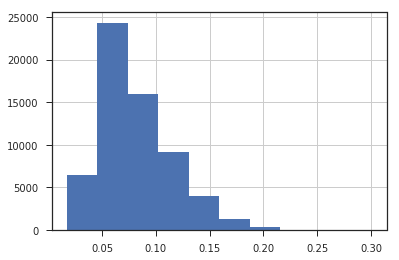

In [40]:
pd.Series(log_reg_pred).hist()

In [41]:
pd.Series(log_reg_pred).describe()

count    61503.000000
mean         0.081363
std          0.033123
min          0.017430
25%          0.058089
50%          0.073869
75%          0.100792
max          0.300117
dtype: float64